# GP Initial Implementation: Scikit-Learn

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Fetch dataset from UCI Repository
from ucimlrepo import fetch_ucirepo
heart_disease = fetch_ucirepo(id=45)
df = heart_disease.data.original

In [12]:
# Drop missing values
df = df.dropna()
df = df.reset_index(drop=True)

# Binarize data
df.loc[df['num'] != 0, 'num'] = 1

In [13]:
# Define features and target vectors
X = df.iloc[:,:-1].values
y = df['num'].values

In [14]:
# Import specifics
import torch
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score

In [15]:
# Split train and test data
Test_Size = 0.2
Random_Seed = 82024

index = list(range(y.size))
train_index, test_index = train_test_split(index, test_size=Test_Size, random_state=Random_Seed)

train_df = df.loc[train_index]
test_df = df.loc[test_index]

In [16]:
# Create PyTorch tensors for X and y
train_X = torch.tensor(train_df.iloc[:,:-1].values)
train_y = torch.tensor(train_df['num'].values).double()

test_X = torch.tensor(test_df.iloc[:,:-1].values)
test_y = torch.tensor(test_df['num'].values).double()

In [17]:
# Create model
model = GaussianProcessClassifier(random_state=Random_Seed, kernel=RBF(length_scale=1.0))

In [18]:
# Train model
model.fit(train_X, train_y)

# LOSS!
loss_list = []

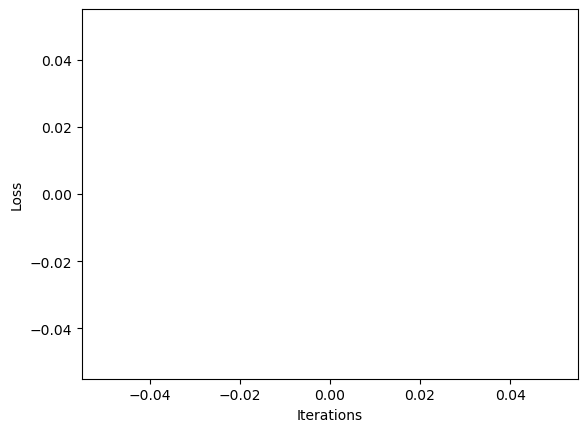

In [19]:
# Plot loss values
plt.plot(loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

In [20]:
# Test model
y_pred = model.predict(test_X)

pred_probs = model.predict_proba(test_X)

# Evaluation:
acc = accuracy_score(test_y, y_pred)
roc_auc = roc_auc_score(test_y, pred_probs[:, 1])

print(f"Accuracy: {acc:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Accuracy: 0.57
AUC-ROC: 0.51
